# Approximation

In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [5]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50) # The x values used for the plotting and the calculations

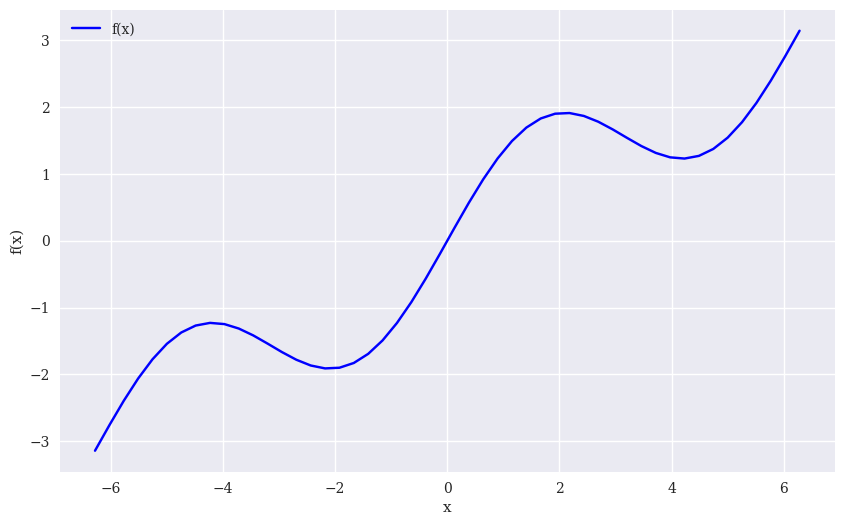

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

# Regression

$$
\min_{\alpha_1, \dots, \alpha_D} \frac{1}{I} \sum_{i=1}^{I} \left( y_i - \sum_{d=1}^{D} \alpha_d \cdot b_d(x_i) \right)^2
$$


In [7]:
res = np.polyfit(x, f(x), deg=1, full=True) # linear regression step

In [8]:
res # full results: regression parameters, residuals, effective rank, singular values, and relative condition number

(array([ 4.28841952e-01, -4.31775426e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [9]:
ry = np.polyval(res[0], x) # evaluation using the regression parameters

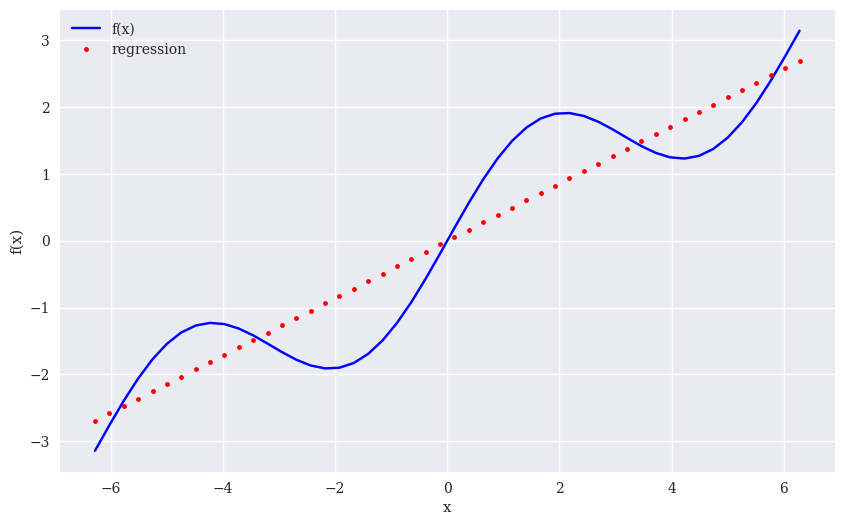

In [10]:
create_plot([x,x], [f(x), ry], ['b','r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

In [11]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

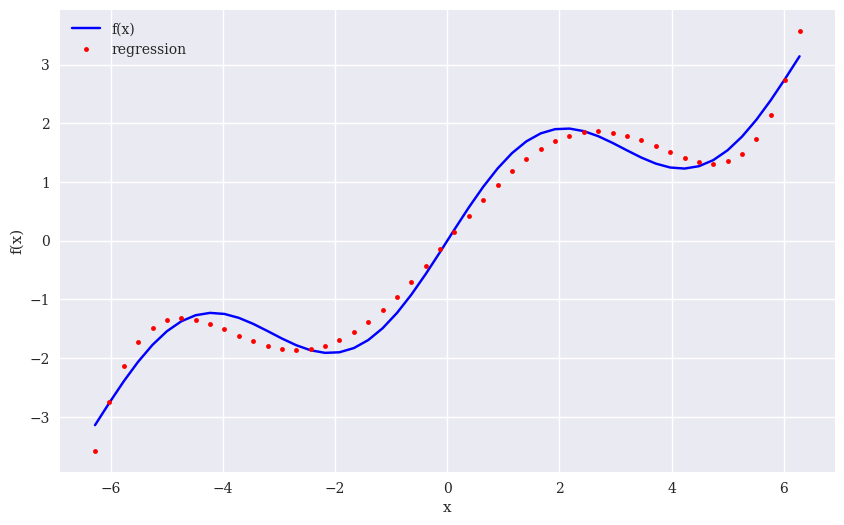

In [12]:
create_plot([x,x], [f(x), ry], ['b','r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

In [13]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [14]:
np.allclose(f(x), ry) # checks whether the function and regression values are the same (or at least close)

False

In [15]:
np.mean((f(x) - ry) ** 2) # calculates the Mean Squared Error(MSE) for the regression values given the function values

0.0017769134759517873

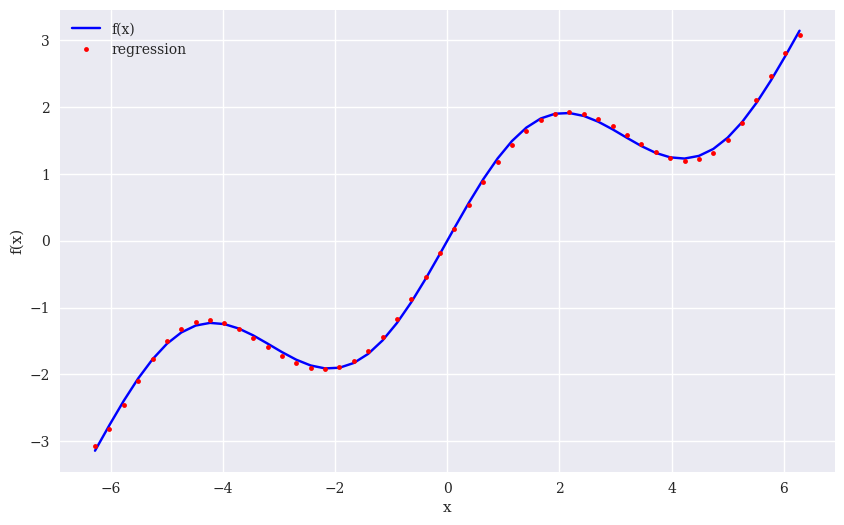

In [16]:
create_plot([x,x], [f(x), ry], ['b','r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

## Individual Basis Functions

In [17]:
matrix = np.zeros((3 + 1, len(x))) # the ndarray object for the basis function values(matrix)
matrix[3, :] = x ** 3 # the basis function values from constant to cubic
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [18]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0] # the regression step

In [19]:
reg.round(4) # the optimal regression parameters

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [20]:
ry = np.dot(reg, matrix) # the regression estimates for the function values

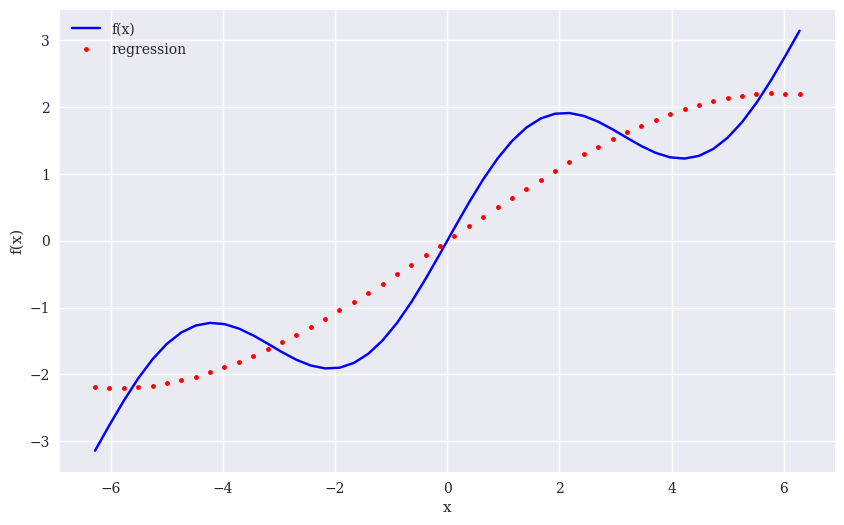

In [21]:
create_plot([x,x], [f(x), ry], ['b','r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

In [22]:
matrix[3, :] = np.sin(x) # the new basis function exploiting knowledge about the example function

In [23]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [24]:
reg.round(4) # the optimal regression parameters recover the original parameters

array([0. , 0.5, 0. , 1. ])

In [25]:
ry = np.dot(reg, matrix)

In [26]:
np.allclose(f(x), ry) # the regression now leads to a perfect fit

True

In [27]:
np.mean((f(x) - ry) ** 2)

2.099263639382087e-31

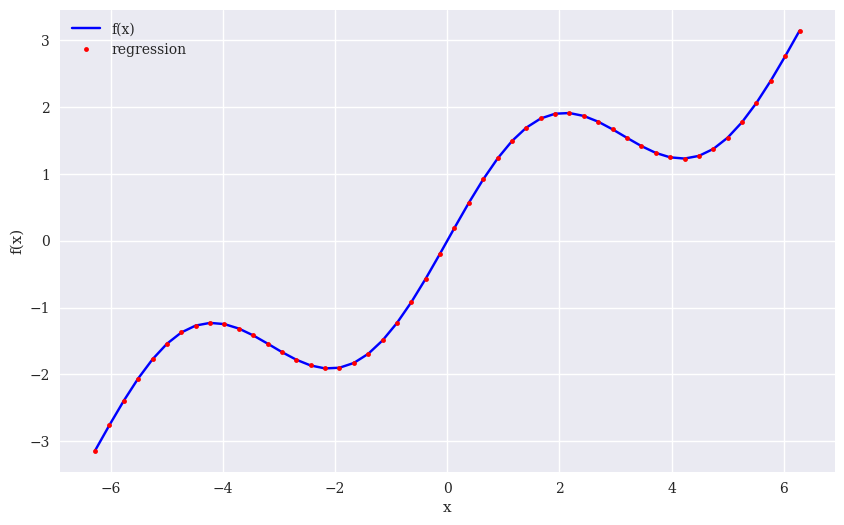

In [28]:
create_plot([x,x], [f(x), ry], ['b','r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

## Noisy Data

In [29]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50) # the new deterministic x values
xn = xn + 0.15 * np.random.standard_normal(len(xn)) # introducing noise to the x values
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn)) # introducing noise to the y values

In [30]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

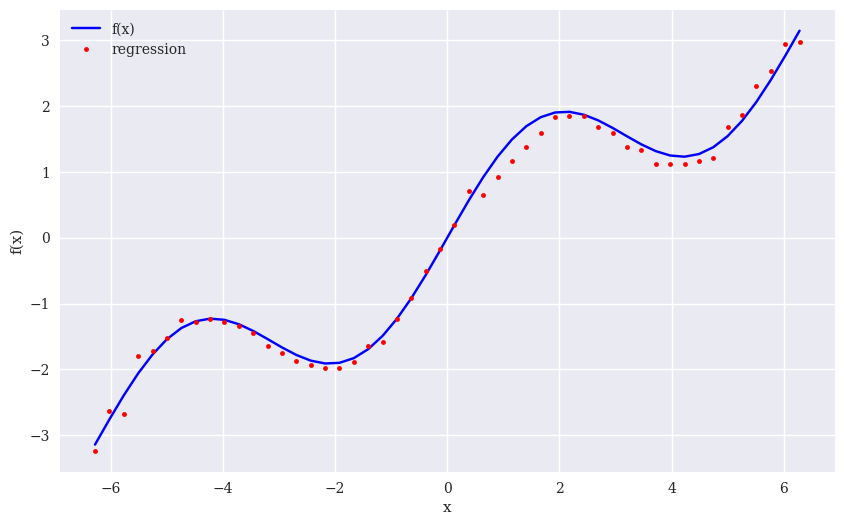

In [31]:
create_plot([x,x], [f(x), ry], ['b','r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

## Unsorted Data

In [32]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi # randomizes the x values
yu = f(xu)

In [33]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-2.45 -2.93  3.15  6.22 -3.88  3.66 -4.12  0.79  5.65  2.91]
[-1.86 -1.67  1.57  3.05 -1.27  1.33 -1.23  1.1   2.23  1.69]


In [34]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

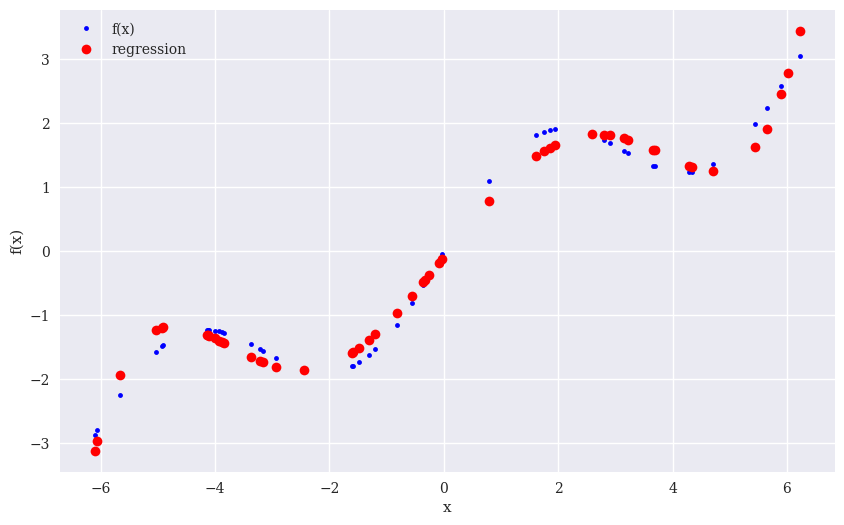

In [35]:
create_plot([xu, xu], [yu, ry],['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

## multiple dimensions

In [36]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [37]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)    # generates 2D ndarray objects('grids') out of the 1D ndarray objects

In [38]:
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()    # yields 1D ndarray objects from the 2D ndarray objects

In [39]:
from mpl_toolkits.mplot3d import Axes3D

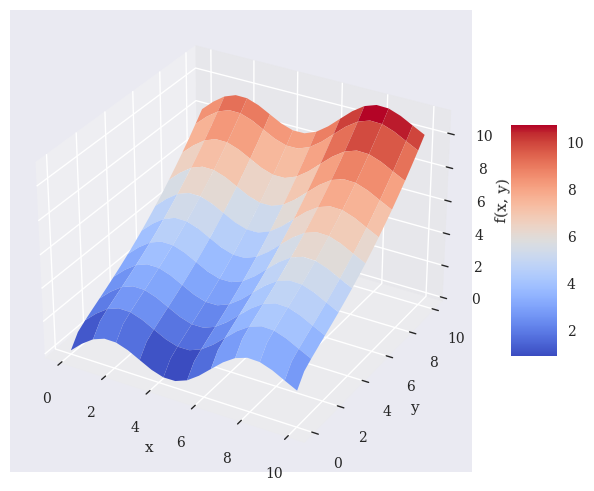

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                       cmap = 'coolwarm', linewidth = 0.5,
                       antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [41]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:,6] = np.sqrt(y)    # the np.sqrt() function for the y parameter
matrix[:,5] = np.sin(x)     # the np.sin() function for the x parameter
matrix[:,4] = y ** 2
matrix[:,3] = x ** 2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] = 1

In [42]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [43]:
RZ = np.dot(matrix, reg).reshape((20, 20))  # transforms the regression results to the grid structure

/var/folders/kx/tt33d8bd3t36vq3mm79tshdh0000gn/T/ipykernel_1921/4028128679.py:12: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 3 Axes> than <Figure size 1000x600 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(surf, shrink=0.5, aspect=5)


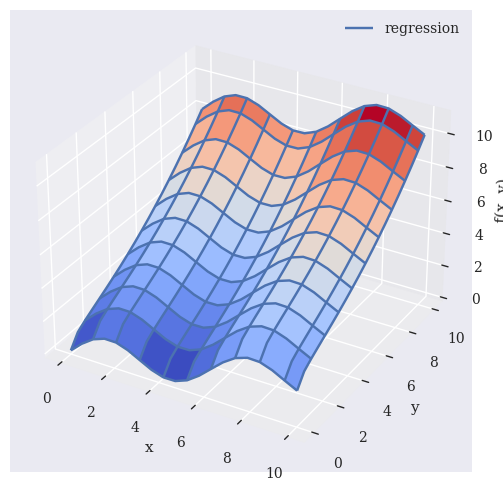

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                       cmap = 'coolwarm', linewidth = 0.5,
                       antialiased = True)  # plots the original function surface
surf2 = ax.plot_wireframe(X, Y, RZ, rstride = 2, cstride = 2,
                          label = 'regression') # plots the regression surface
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

## Interpolation

In [45]:
import scipy.interpolate as spi # imports the required subpackage from SciPy

In [46]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [47]:
def f(x):
    return np.sin(x) + 0.5 * x

In [48]:
ipo = spi.splrep(x, f(x), k=1) # implements a linear spline interpolation

In [49]:
iy = spi.splev(x, ipo) # derives the interpolated values

In [50]:
np.allclose(f(x), iy) # checks whether the interpolated values are close (enough) to the function values

True

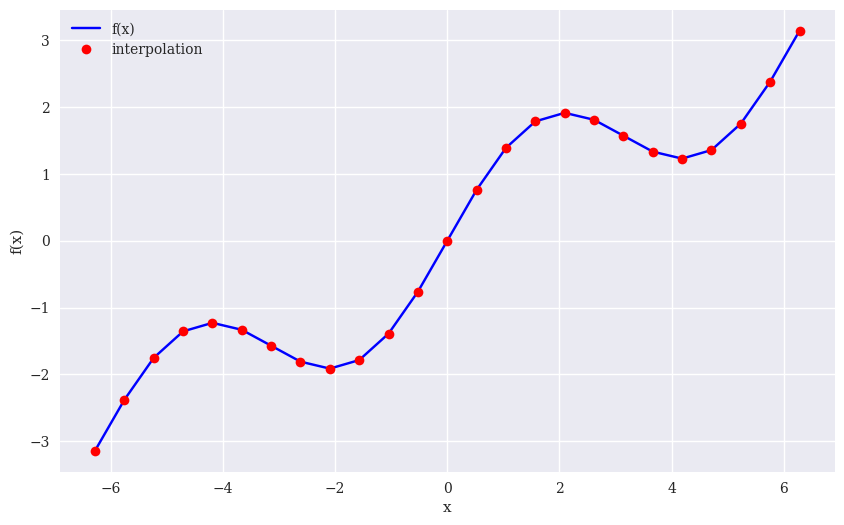

In [51]:
create_plot([x,x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])

In [52]:
xd = np.linspace(1.0, 3.0, 50) # smaller interval with more points
iyd = spi.splev(xd, ipo)

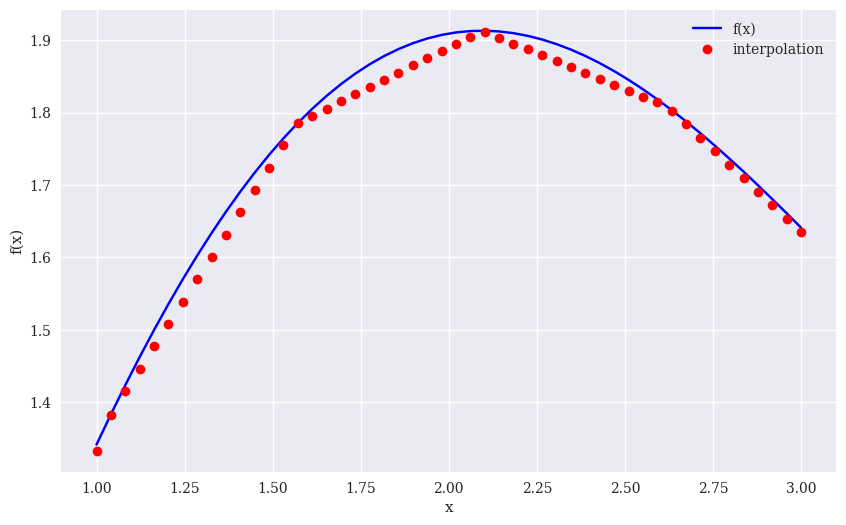

In [53]:
create_plot([xd,xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])

In [54]:
ipo = spi.splrep(x, f(x), k=3) # cubic splines interpolation on complete data sets
iyd = spi.splev(xd, ipo) # results applied to the smaller interval

In [55]:
np.allclose(f(xd), iyd) # the interpolation is still not perfect...

False

In [56]:
np.mean((f(xd) - iyd) ** 2) # ... but better than before

1.1349319851457788e-08

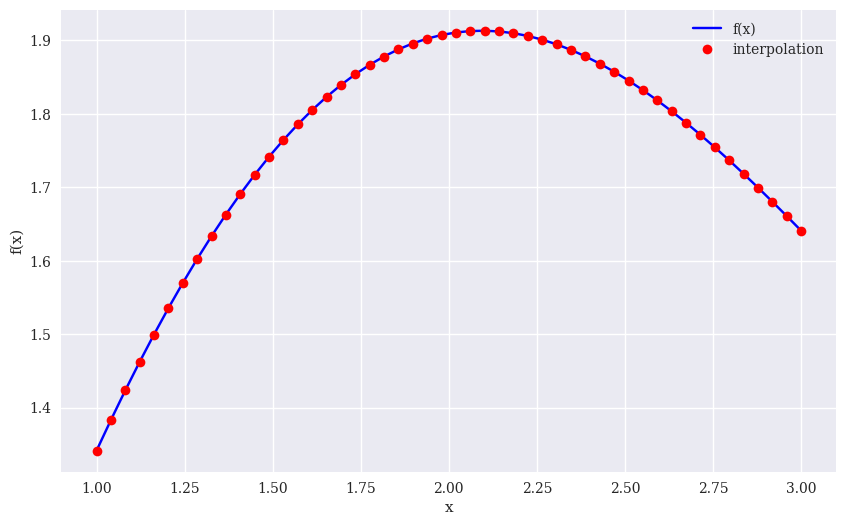

In [57]:
create_plot([xd,xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])

# Convex Optimization

In [58]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
            + np.sin(y) + 0.05 * y ** 2)

In [59]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

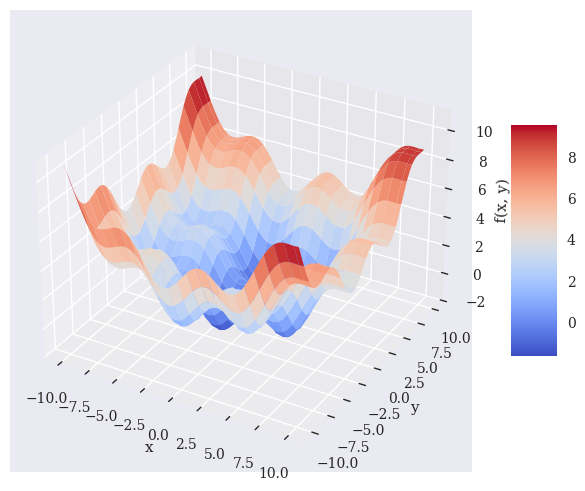

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                       cmap = 'coolwarm', linewidth = 0.5,
                       antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

## Global Optimization

In [61]:
import scipy.optimize as sco    # imports the required subpackage from SciPy

In [62]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.5 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  # the information to print out if output = true
    return z

In [63]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None) # the brute force optimization

-10.0000 | -10.0000 |  56.0880
-10.0000 |  -5.0000 |  52.7529
-10.0000 |   0.0000 |  50.5440
-10.0000 |   5.0000 |  50.8351
-10.0000 |  10.0000 |  55.0000
 -5.0000 | -10.0000 |  19.0029
 -5.0000 |  -5.0000 |  15.6678
 -5.0000 |   0.0000 |  13.4589
 -5.0000 |   5.0000 |  13.7500
 -5.0000 |  10.0000 |  17.9149
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |  17.0851
  5.0000 |  -5.0000 |  13.7500
  5.0000 |   0.0000 |  11.5411
  5.0000 |   5.0000 |  11.8322
  5.0000 |  10.0000 |  15.9971
 10.0000 | -10.0000 |  55.0000
 10.0000 |  -5.0000 |  51.6649
 10.0000 |   0.0000 |  49.4560
 10.0000 |   5.0000 |  49.7471
 10.0000 |  10.0000 |  53.9120


array([0., 0.])

In [64]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [65]:
opt1

array([-0.7, -1.4])

In [66]:
fm(opt1)

-1.5071674172261507

## Local Optimization

In [67]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20) # local convex optimization

 -0.7000 |  -1.4000 |  -1.2867
 -0.7350 |  -1.4000 |  -1.2879
 -0.7000 |  -1.4700 |  -1.2861
 -0.7350 |  -1.3300 |  -1.2832
 -0.7087 |  -1.4350 |  -1.2876
 -0.7437 |  -1.4350 |  -1.2883
 -0.7656 |  -1.4525 |  -1.2874
 -0.7700 |  -1.4000 |  -1.2871
 -0.7241 |  -1.4263 |  -1.2882
 -0.7328 |  -1.4613 |  -1.2877
 -0.7345 |  -1.4153 |  -1.2883
 -0.7541 |  -1.4241 |  -1.2882
 -0.7316 |  -1.4257 |  -1.2883
 -0.7409 |  -1.4454 |  -1.2882
 -0.7361 |  -1.4228 |  -1.2883
 -0.7482 |  -1.4321 |  -1.2883
 -0.7357 |  -1.4273 |  -1.2883
 -0.7281 |  -1.4151 |  -1.2882
 -0.7398 |  -1.4300 |  -1.2883
 -0.7395 |  -1.4345 |  -1.2883


/var/folders/kx/tt33d8bd3t36vq3mm79tshdh0000gn/T/ipykernel_1921/329759064.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20) # local convex optimization


In [68]:
opt2

array([-0.73982574, -1.4300354 ])

In [69]:
fm(opt2)

-1.5346515778498422

## Constrained Optimization

In [70]:
import math

In [71]:
def Eu(p): # the function to be minimized, in order to maximize the expected utility
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) + 0.5 * math.sqrt(s * 5 + b * 12))

In [72]:
cons = ({'type' : 'ineq',
         'fun' : lambda p: 100 - p[0] * 10 - p[1] * 10}) # the inequality constraint as a dict object

In [73]:
bnds = ((0, 1000), (0, 1000)) # the boundary values for the parameters (chosen to be wide enough)

In [74]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                      bounds=bnds, constraints=cons) # the constrained optimization

In [75]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [76]:
result['x'] # the optimal parameter values

array([8.02547122, 1.97452878])

In [77]:
-result['fun'] # the negative minimum function value as the optimal solution value

9.700883611487832

In [78]:
np.dot(result['x'], [10, 10]) # the budget constraint is binding; all wealth is invested

100.0

# Integration

In [79]:
import scipy.integrate as sci

In [80]:
def f(x):
    return np.sin(x) + 0.5 * x

In [81]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5 # left integration limit
b = 9.5 # right integration limit
Ix = np.linspace(a, b) # integration interval values
Iy = f(Ix) # integration function values

In [82]:
from matplotlib.patches import Polygon

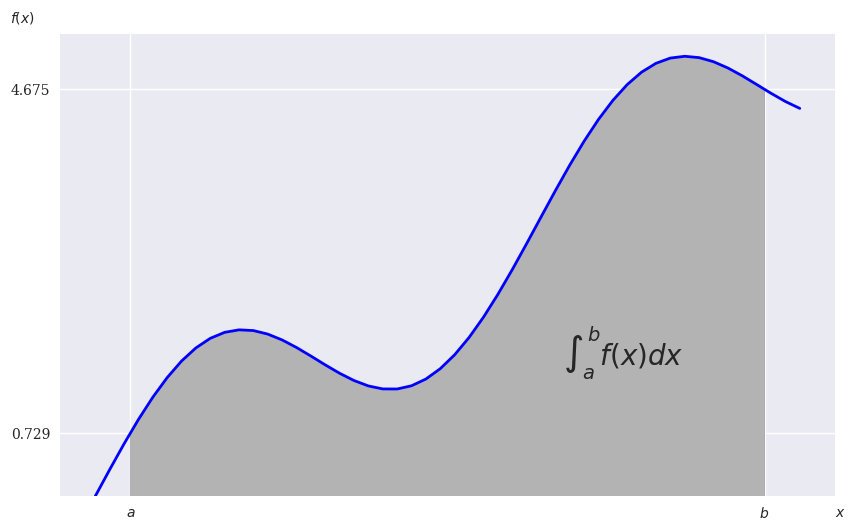

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a,b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment = 'center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);

## Numerical Integration

In [84]:
sci.fixed_quad(f, a, b)[0]

24.366995967084605

In [85]:
sci.quad(f, a, b)[0]

24.374754718086752

In [86]:
sci.romberg(f, a, b)

/var/folders/kx/tt33d8bd3t36vq3mm79tshdh0000gn/T/ipykernel_1921/1094288420.py:1: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  sci.romberg(f, a, b)


24.374754718086713

In [87]:
xi = np.linspace(0.5, 9.5, 25)

In [88]:
sci.trapz(f(xi), xi)

/var/folders/kx/tt33d8bd3t36vq3mm79tshdh0000gn/T/ipykernel_1921/3872947094.py:1: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  sci.trapz(f(xi), xi)


24.352733271544516

In [89]:
sci.simps(f(xi), xi)

/var/folders/kx/tt33d8bd3t36vq3mm79tshdh0000gn/T/ipykernel_1921/30335699.py:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  sci.simps(f(xi), xi)


24.37496418455075

## Integration by Simulation

In [90]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a  # Number of random x values is increased with every iteration
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# Symbolic Computation

## Basic

In [91]:
import sympy as sy

In [92]:
x = sy.Symbol('x')  # Defines symbols to work with
y = sy.Symbol('y')

In [93]:
type(x)

sympy.core.symbol.Symbol

In [94]:
sy.sqrt(x)  # Applies a function on a symbol

sqrt(x)

In [95]:
3 + sy.sqrt(x) - 4 ** 2    # a numerical expression defined on symbol

sqrt(x) - 13

In [96]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2   # a function defined symbolically

In [97]:
sy.simplify(f)  # the function expression simplified

1.5*x**2 + 4.5

In [98]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [99]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [100]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [101]:
%time pi_str = str(sy.N(sy.pi, 400000))    # returns the string representation of the first 400000 digits of pi

CPU times: user 9.79 s, sys: 9.28 ms, total: 9.8 s
Wall time: 9.84 s


In [102]:
pi_str[:42]    # shows the first 40 digits

'3.1415926535897932384626433832795028841971'

In [103]:
pi_str[-40:]    # and the final 40 digits

'8245672736856312185020980470362464176199'

In [104]:
%time pi_str.find('061072')    # searches for a birthday date in the string

CPU times: user 153 µs, sys: 10 µs, total: 163 µs
Wall time: 166 µs


80847

## Equations

In [105]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [106]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [107]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [108]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

## Integration and Differentiation

In [109]:
a, b = sy.symbols('a b')    # the symbolic objects for the integral limits

In [110]:
I = sy.Integral(sy.sin(x) + 0.5 ** x, (x, a, b))    # the integral object defined and pretty-printed

In [111]:
print(sy.pretty(I))

  b                   
  /                   
 |                    
 |  /   x         \   
 |  \0.5  + sin(x)/ dx
 |                    
/                     
a                     


In [112]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)    # the antiderivative derived and pretty-printed

In [113]:
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [114]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()  # the values of the antiderivative at the limits, obtained via the .subs() and .evalf() methods

In [115]:
Fb - Fa    # the exact numerical value of integral

24.3747547180867

In [116]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))  # solving the integral symbolically

In [117]:
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [119]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()   # solving the integral numerically, using a dict object during substitution

24.3747547180868

In [120]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))    # solving the integral numerically in a single step

24.3747547180867

## Differentiation

In [121]:
int_func.diff()

0.5*x + sin(x)

In [122]:
f = (sy.sin(x) + 0.05 * x ** 2
    + sy.sin(y) + 0.05 * y ** 2)    # the symbolic version of the function

In [123]:
del_x = sy.diff(f, x)   # the two partial derivatives derived and printed
del_x

0.1*x + cos(x)

In [124]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [126]:
xo = sy.nsolve(del_x, -1.5)    # educated guesses for the roots and resulting optimal values
xo

-1.42755177876459

In [127]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [128]:
f.subs({x : xo, y: yo}).evalf()    # the global minimum function value

-1.77572565314742

In [129]:
xo = sy.nsolve(del_x, 1.5)     # uneducated guesses for the roots
xo


1.74632928225285

In [130]:
yo = sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [131]:
f.subs({x : xo, y: yo}).evalf()    # the local minimum function value

2.27423381055640